In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


'Common Variables'
pi = np.pi
sin = np.sin
sqrt = np.sqrt

#### 4th Order Runga Kutta Method for solving ODE's

In [2]:
def runga_kutta_4(f, t, q, work,  n_points):
    global time_array; global q_array

    h = (t[-1] - t[0])/n_points
    t_sol, q_sol = 0, q
    
    time_array = np.zeros(n)
    q_array = []

    for i in range(0, n):
        k1 = h*f(q_sol, t_sol, work)
        k2 = h*f(q_sol + 0.5*k1, t_sol + 0.5*h, work)
        k3 = h*f(q_sol + 0.5*k2, t_sol + 0.5*h, work)
        k4 = h*f(q_sol + k3, t_sol + h, work)
  
        t_sol = t_sol + h
        time_array[i] = t_sol
        
        q_sol = q_sol + ((k1 + 2*k2 + 2*k3 + k4)/6)
        q_array.append(q_sol)


### Functions for problems 1 and 2

#### Function to graph coupled ODE's in 3-dimensions

In [3]:
def graph3D(x_t, y_t, z_t, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x_t, y_t, z_t, lw=0.5)
    ax.set_title(title)
    
    ax.set_xlabel = 'x_t'
    ax.set_ylabel = 'y_t'
    ax.set_zlabel = 'z_t'
    
    plt.show()

#### Parse function for problems 1 and 2

In [4]:
'Creates the x_t, y_t, z_t arrays from the runga kutta solutions q'
def parse(q):
    global x_t; global y_t; global z_t
    x_t, y_t, z_t = [], [], []
    
    for i in range(0, n-1): x_t.append(q_array[i][0])
    for i in range(0, n-1): y_t.append(q_array[i][1])
    for i in range(0, n-1): z_t.append(q_array[i][2])

# Problem 1

In [5]:
###################### PROBLEM 11.6 ######################

'Defining the coupled Lorentz equations'
def lorenz(q, t, work):
    #x = q[0]; y = q[1]; z = [2]
    #sigma = work[0]; b = work[1]; r = work[2]
    
    dx_dt =  work[0]*(q[1] - q[0])
    dy_dt =  work[2]*q[0] - q[1] - q[0]*q[2]
    dz_dt =  q[0]*q[1] - work[1]*q[2]

    q_sol = np.array([dx_dt, dy_dt, dz_dt])
    return q_sol


### Part a.)

In [6]:
'Time points'
t_max = 20 # In seconds
n = 2000
t = np.linspace(0, t_max, n)

'Initial Conditions'
sigma = 10
b = 8/3
x = 2; y = 2; z = 5

'Build Arrays'
initial_conditions = np.array([x, y, z])

#### Solve when r = 0

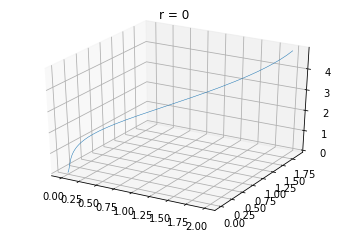

In [7]:
r = 0
work = [sigma, b, r]

'Run the 4th Order Runga Kutta algorithm to solve the differential equation'
runga_kutta_4(lorenz, t, initial_conditions,  work,  n)

'Build Arrays to Plot'
parse(q_array)

'Plot the the ouput'
graph3D(x_t, y_t, z_t, 'r = ' + str(r))

#### Solve when r = 10

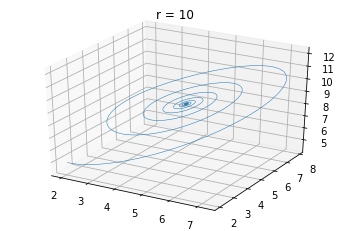

In [8]:
r = 10
work = [sigma, b, r]

'Run the 4th Order Runga Kutta algorithm to solve the differential equation'
runga_kutta_4(lorenz, t, initial_conditions,  work,  n)

'Build Arrays to Plot'
parse(q_array)

'Plot the the ouput'
graph3D(x_t, y_t, z_t, 'r = ' + str(r))

#### Solve when r = 20

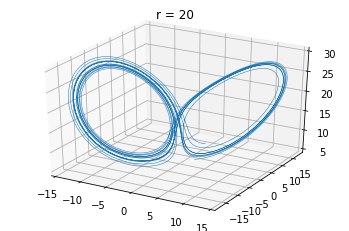

In [9]:
r = 20
work = [sigma, b, r]

'Run the 4th Order Runga Kutta algorithm to solve the differential equation'
runga_kutta_4(lorenz, t, initial_conditions,  work,  n)

'Build Arrays to Plot'
parse(q_array)

'Plot the the ouput'
graph3D(x_t, y_t, z_t, 'r = ' + str(r))

### Part b.)

#### Solve when r = 28

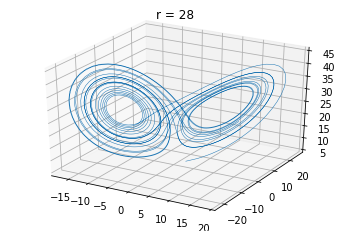

In [10]:
r = 28
work = [sigma, b, r]

'Run the 4th Order Runga Kutta algorithm to solve the differential equation'
runga_kutta_4(lorenz, t, initial_conditions,  work,  n)

'Build Arrays to Plot'
parse(q_array)

'Plot the the ouput'
graph3D(x_t, y_t, z_t, 'r = ' + str(r))

# Problem 2

In [11]:
###################### PROBLEM 11.7 ######################

'Defining the coupled Simple Lorentz (Rossler Attractor) equations'
def simple_lorenz(q, t, work):
    'q[0] = x, q[1] = y, q[2] = z'
    'work[0] = a. work[1] = b, work[2] = c'
    
    dx_dt =  -(q[1] + q[2])
    dy_dt =  q[0] + work[0]*q[1]
    dz_dt =  work[1] + q[2]*(q[0] - work[2])

    q_sol = np.array([dx_dt, dy_dt, dz_dt])
    return q_sol

### Part a.)

In [12]:
'Time points'
t_max = 200 # In seconds
n = 20000
t = np.linspace(0, t_max, n)

'Initial Conditions varying the value of c'
x = -1; y = 0; z = 0
a = .2; b = .2
'c points around 5.7'
c_min = 5.0
c_max = 6.4 
c_points = 5
c = np.linspace(c_min, c_max, c_points)

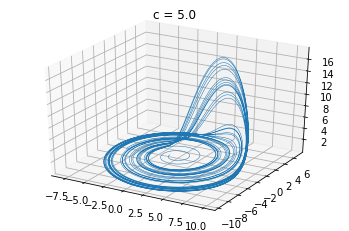

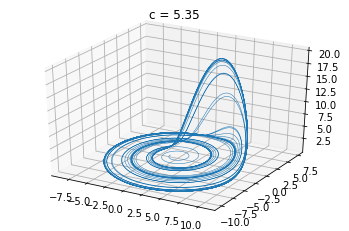

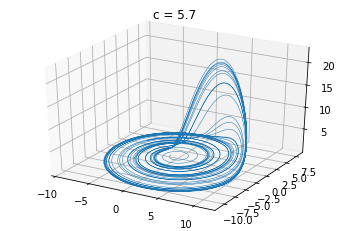

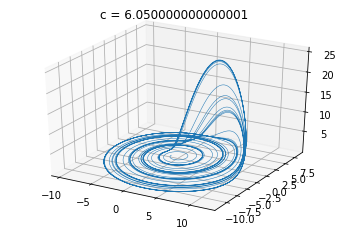

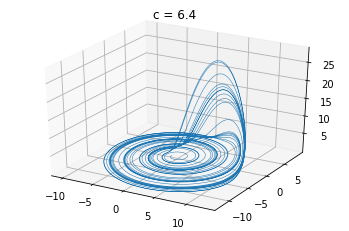

In [13]:
for i in c:
    'Build Arrays'
    initial_conditions = np.array([x, y, z])
    work = [a, b, i]

    'Run the 4th Order Runga Kutta algorithm to solve the'
    'differential equation'
    runga_kutta_4(simple_lorenz, t, initial_conditions,  work,  n)

    'Build Arrays to Plot'
    parse(q_array)
    
    'Plot the the ouput'
    graph3D(x_t, y_t, z_t, 'c = ' + str(i))

### Part b.) 

In [14]:
' Initial Conditions varying the initial x(0), y(0), z(0) '
initial_values = [[-1, 0, 0], [0, 1, 1], [-1, -1, -1], [2, -1, 3], [-5, -1, 4]]
a = .2; b = .2; c = 5.7

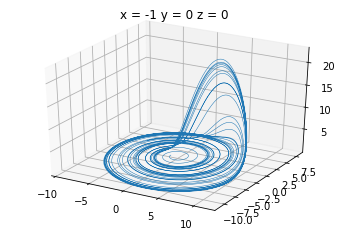

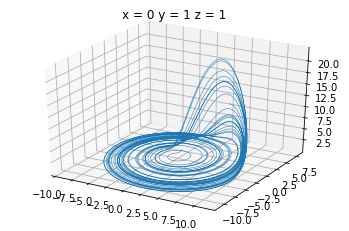

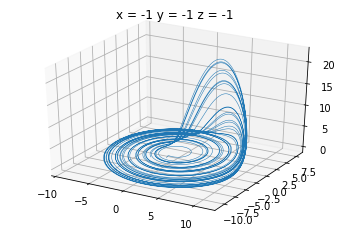

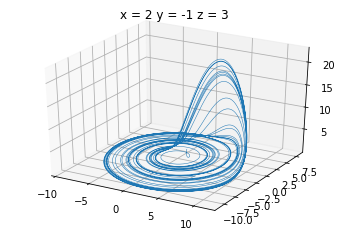

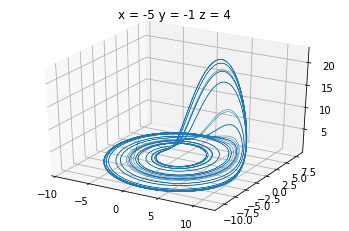

In [15]:
for i in initial_values:
    'Build Arrays'
    x_0 = i[0]
    y_0 = i[1] 
    z_0 = i[2]
    
    initial_conditions = np.array([x_0, y_0, z_0])
    work = [a, b, c]

    'Run the 4th Order Runga Kutta algorithm to solve the'
    'differential equation'
    runga_kutta_4(simple_lorenz, t, initial_conditions,  work,  n)

    'Build Arrays to Plot'
    parse(q_array)
    
    'Plot the the ouput'
    graph3D(x_t, y_t, z_t, 'x = ' + str(x_0) + ' y = ' + str(y_0) +  ' z = ' + str(z_0))

## Problem 3

In [16]:
######################################## PROBLEM 11.8 ########################################
def duffing_oscillator(q, t, work):
    ' q[0] = x_t '
    ' work[0] = alpha. work[1] = beta, work[2] = gamma,  work[3] = F , work[4] = w'
    cos = np.cos

    x = q[0]
    dx_dt = q[1]
    alpha = work[0];  beta = work[1]; gamma = work[2]; F = work[3];  w = work[4]
    
    dx_dt =  dx_dt
    dv_dt =  F*cos(w*t) - beta*(x**3) - alpha*x - 2*gamma*dx_dt

    q_sol = np.array([dx_dt, dv_dt])
    return q_sol

### Part a.) 

We can see that hysterisis does occur in this scenario.

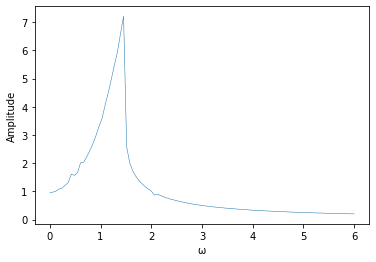

In [17]:
'Time points'
t_max = 100 # In seconds
n = 1000
t = np.linspace(0, t_max, n)

################## PART a.) ##################
' Initial Conditions '
dx_dt = 0
x_0 = 0
alpha = 1; beta = .2; gamma = 0; F = 1.0#; w = 0
'Build Arrays'
initial_conditions = np.array([x_0, dx_dt])

w_points = np.linspace(0,6, 100)
A = []; w_values = []

for j in w_points:
    w = j
    work = [alpha, beta, gamma, F, w]
    ' Run the 4th Order Runga Kutta algorithm to solve the differential equation '
    runga_kutta_4(duffing_oscillator, t, initial_conditions,  work,  n)

    ' Build Arrays to Plot '
    x_t = []
    for i in range(0, n):
        x_t.append(q_array[i][1])
        
    A.append(max(x_t))
    w_values.append(w)
    #print(max(x_t))

' Plot the the ouput'
#ax, fig = plt.figure()
plt.plot(w_values, A, lw=0.5)
plt.xlabel('\u03C9')
plt.ylabel('Amplitude')
plt.show()

### Part b.) 

Here I varied the force with a consistent omega at 1.6.

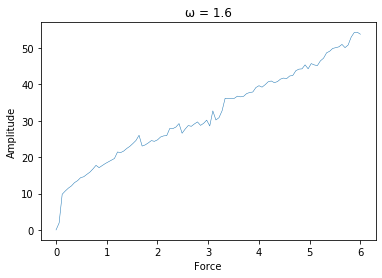

In [18]:
################## PART b.) ##################
' Initial Conditions '
dx_dt = 0
x_0 = 0
alpha = 1; beta = .2; gamma = 0; w = 1.6
'Build Arrays'
initial_conditions = np.array([x_0, dx_dt])

F_points = np.linspace(0, 100, 100)
A = []; F_values = []

for j in F_points:
    F = j
    work = [alpha, beta, gamma, F, w]
    ' Run the 4th Order Runga Kutta algorithm to solve the differential equation '
    runga_kutta_4(duffing_oscillator, t, initial_conditions,  work,  n)

    ' Build Arrays to Plot '
    x_t = []
    for i in range(0, n):
        x_t.append(q_array[i][1])
        
    A.append(max(x_t))
    F_values.append(F)
    #print(max(x_t))
    
'Plot the the ouput'
#ax, fig = plt.figure()
plt.plot(w_values, A, lw=0.5)
plt.title('\u03C9 = ' + str(w))
plt.xlabel('Force')
plt.ylabel('Amplitude')
plt.show()

## Problem 4

In [19]:
###################### PROBLEM 11.12 ######################
import random
import sys
import warnings
warnings.filterwarnings('ignore')

def graph2D(center, x, y, p_x, p_y, title):
    fig, ax = plt.subplots(1)
    ax.plot(x, y, linewidth = .5)
    ax.scatter(p_x, p_y, s=1)

    ax.set_aspect(1)
    ax.set_xlim([center[0] - 5, center[0] + 5])
    ax.set_ylim([center[1] - 5, center[1] + 5])
    ax.set_title(title)
    plt.show()


### Part a and b (The case of a central particle and one other particle)
#### The grid is from 0 to 100 in the x, y planes with a step size of a = 1.

In [20]:
'Set the central particle in x, y coordinates' 
particles_x = [50]
particles_y = [50]

'Grid step size'
a = 1

check = 're-roll'
'Generate a particle at a random position that is not the center'
while check == 're-roll':
    rand_x = random.randint(0, 100) # 'replace with nx'
    rand_y = random.randint(0, 100) # 'replace with ny'

    if ((rand_x in particles_x) and (rand_y in particles_y)):
        check = 're-roll'
    else:
        check = 'continue'

particles_x.append(rand_x)
particles_y.append(rand_y)

particles_x[1] = 51
particles_y[1] = 50
print(particles_x[1], particles_y[1])

51 50


[50, 51] [50, 50]


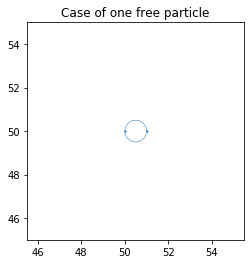

R_min: 0.5


SystemExit: Second particle is located at x = 51, y = 50

In [21]:
'Allow the particle to randomly move until adjacent to center or out of the grid'
print(particles_x, particles_y)
while True: 
    
    'The case the particle exits the grid'
    if (particles_x[1] < 0 or particles_x[1] > 100 or particles_y[1] < 0 or particles_y[1] > 100):
        #print(particles_x[1], particles_y[1])
        sys.exit('Particle exited the grid')

    'Check if the particle becomes adjacent to the central particle'
    if ((particles_x[1] == 50 + a or particles_x[1] == 50 - a) and particles_y[1] == 50) or ((particles_y[1] == 50 + a or particles_y[1] == 50 - a) and particles_x[1] == 50):

        'Get the maximum and minimum of x, y values of the stopped particles'
        centroid_x = sum(particles_x)/len(particles_x)
        centroid_y = sum(particles_y)/len(particles_y)

        center = [centroid_x, centroid_y]
        #print(center)

        'Calculate r_min'
        distance = []
        for j in range(1, len(particles_x)):
            distance.append(np.sqrt((particles_x[j] - centroid_x)**2 + (particles_y[j] - centroid_y)**2))
        r_min = max(distance)

        'Plot circle around the particles and calculate R_min'
        # theta goes from 0 to 2pi
        theta = np.linspace(0, 2*np.pi, 100)
        # the radius of the circle
        r = r_min
        # compute x1 and x2
        x1 = r*np.cos(theta) + center[0]
        x2 = r*np.sin(theta) + center[1]
        # create the circle
        graph2D(center, x1, x2, particles_x, particles_y, 'Case of one free particle')
        
        print('R_min: ' + str(r))
        
        'Exit the program'
        sys.exit('Second particle is located at ' + 'x = ' + str(particles_x[1]) + ', y = ' + str(particles_y[1]))


    'Performing the random movement'
    # movement in the x or y direction 
    rand_move = random.randint(0, 1)
    # movement is positive or negative direction 
    rand_dir = random.randint(0, 1)

    'Determining which way the particle will move' 
    if rand_move == 0:
        if rand_dir == 0: particles_x[1] = particles_x[1] - 1
        else: particles_x[1] = particles_x[1] + 1
        
    if rand_move == 1:
        if rand_dir == 0: particles_y[1] = particles_y[1] - 1
        else: particles_y[1] = particles_y[1] + 1

Here we can see that the calculated R_min came out as expected .5, which was a/2, where a in this case was 1.

### Part c.)

In [22]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

'Particles is written in x, y coordinates' 
particles_x = [51, 50, 50]
particles_y = [50, 51, 49]

'The spacing of the lattice points'
a = 1

' Set the number of particles to be generated '
N = 25

for i in range(1, N):
    check = 're-roll'
    'Generate a particle at a unique random position'
    while check == 're-roll':
        rand_x = random.randint(0, 100) # 'replace with nx'
        rand_y = random.randint(0, 100) # 'replace with ny'

        if ((rand_x in particles_x) and (rand_y in particles_y)):
            check = 're-roll'
        else:
            check = 'continue'

    particles_x.append(rand_x)
    particles_y.append(rand_y)
    
'Print the initial set of semi random particles'
print(particles_x, particles_y)

[51, 50, 50, 52, 97, 7, 16, 50, 28, 37, 71, 57, 73, 35, 86, 96, 62, 83, 22, 78, 85, 13, 83, 23, 68, 71, 52] [50, 51, 49, 8, 72, 9, 100, 85, 23, 89, 26, 71, 54, 22, 23, 47, 41, 17, 80, 17, 94, 79, 21, 11, 80, 63, 42]


#### Move the random particles until each of them has left the grid or stopped.

In [23]:
'Create two lists to set the particles that leave the grid or become adjacent to cluster'
exited_particles = []
stopped_particles = [(50,50)]

'Allow the particle to randomly move until adjacent to center or out of the grid'
while (len(particles_x) != 0 and len(particles_y) != 0) :
    size = len(particles_x)
    'Check if the particle becomes adjacent to any of the stopped particles'
    for i in range(0, size):
        for j in range(len(stopped_particles)):
            if dist(particles_x[i], particles_y[i], stopped_particles[j][0], stopped_particles[j][1]) == a:
                print(particles_x[i], particles_y[i])
                stopped_particles.append((particles_x[i], particles_y[i]))
                particles_x[i] = 'del'
                particles_y[i] = 'del'
                break

    for i in range(0, size):
        if (particles_x[i] != 'del' and particles_y[i] != 'del'):
            'Performing the random movement of the particles'
            # movement in the x or y direction 
            rand_move = random.randint(0, 1)
            # movement is positive or negative direction 
            rand_dir = random.randint(0, 1)

            'Setting which way the particle will move' 
            if rand_move == 0:
                if rand_dir == 0: particles_x[i] = particles_x[i] - 1
                else: particles_x[i] = particles_x[i] + 1
                
            if rand_move == 1:
                if rand_dir == 0: particles_y[i] = particles_y[i] - 1
                else: particles_y[i] = particles_y[i] + 1

    'Check if the case the particle exits the grid'
    for i in range(0, size):
        if (particles_x[i] != 'del' and particles_y[i] != 'del'):
            if (particles_x[i] < 0 or particles_x[i] > 100 or particles_y[i] < 0 or particles_y[i] > 100):
                exited_particles.append((particles_x[i], particles_y[i]))
                particles_x[i] = 'del'
                particles_y[i] = 'del'

    'Remove particles that have stopped or exited the grid'
    if ('del' in particles_x and 'del' in particles_y):
        particles_x = [p for p in particles_x if p != 'del']
        particles_y = [p for p in particles_y if p != 'del']

51 50
50 51
50 49
52 50
52 51


#### Calculate the center of the cluster and calculate R_min 

In [24]:
p_x =[]; p_y = []
for i in range(0,len(stopped_particles)):
    p_x.append(stopped_particles[i][0])
    p_y.append(stopped_particles[i][1])
    
'Get the maximum and minimum of x, y values of the stopped particles'
centroid_x = sum(p_x)/len(p_x)
centroid_y = sum(p_y)/len(p_y)

'Calculate center of cluster'
center = [centroid_x, centroid_y]
print(center)

'Calculate r_min (which comes from max distance from the center)'
distance = []
for j in range(1, len(stopped_particles)):
    distance.append(dist(p_x[j], p_y[j], centroid_x, centroid_y))
r_min = max(distance)

print('R_min : ' + str(r_min))

[50.833333333333336, 50.166666666666664]
R_min : 1.4337208778404373


#### Plot results

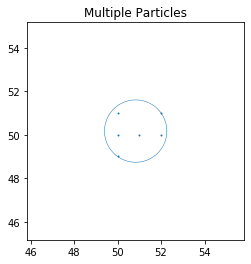

In [25]:
'Plot circle around the particles and calculate R_min'
# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 100)
# the radius of the circle
r = r_min
# compute x1 and x2
x1 = r*np.cos(theta) + center[0]
x2 = r*np.sin(theta) + center[1]
# create the circle
graph2D(center, x1, x2, p_x, p_y, 'Multiple Particles')

### Part d.)

In [26]:
'Calculate Fractal Dimension using R_min from part c'

# Calculating the number of particles left
N = len(stopped_particles)

'Apply the Fractal Dimensio rule'
ln = np.log
D = ln(N)/ln(r_min)
print('The fractal dimension: ' + str(D))

The fractal dimension: 4.973337120519499


## Problem 5 (Extra Credit Problem)

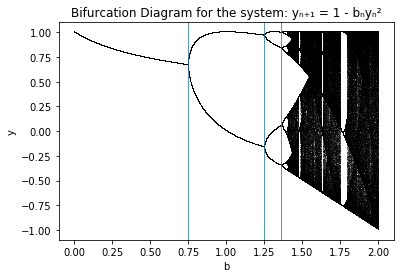

In [27]:
###################### PROBLEM 11.5 ######################
def recursive_func(b, y):
    return 1 - b*y**2

fig, ax = plt.subplots()

'Simulate system for 10000 values of a linearly spaced between 0 and 2'
n = 10000
b = np.linspace(0, 2, n)

'initial condition of system'
y = 1e-5 * np.ones(n)
'number of iterations of system'
iterations = 1000
'we are going to keep last 100 iterations'
last = 100

for i in range(iterations):
    y = recursive_func(b, y)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax.plot(b, y, ',k', alpha=.25)

'Plot vertical lines at each of the bifurcation points'
ax.axvline(x=.75, linewidth = .75)   
ax.axvline(x=1.25, linewidth = .75)
ax.axvline(x=1.360, linewidth = .75)
        
ax.set_xlabel('b')
ax.set_ylabel('y')
ax.set_title('Bifurcation Diagram for the system: ' + 'yₙ₊₁ = 1 - bₙyₙ²')
plt.show()    

The first three bifurcation points are at b = .75, b = 1.25, b = 1.36.